In this tutorial we will learn how to:

1) Create Metabolite and Reaction Objects
2) Use Metabolites and Reactions to reconstruct Biochemical Pathways

# Larger Networks Are Comprised of Many Reconstructed Metabolic Pathways













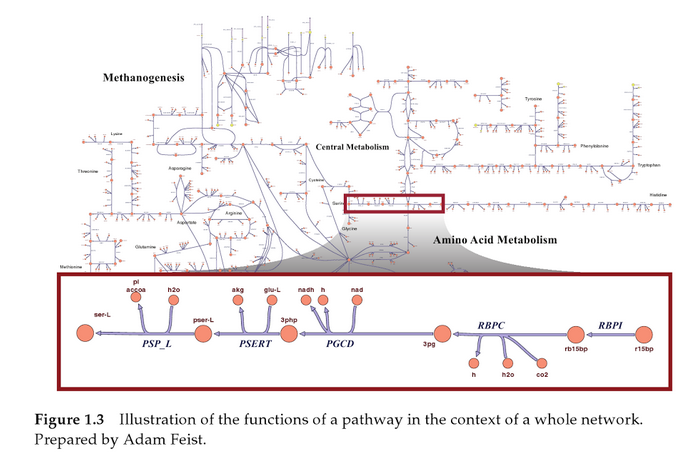

# Let's take the Glycolysis Pathway as an example:

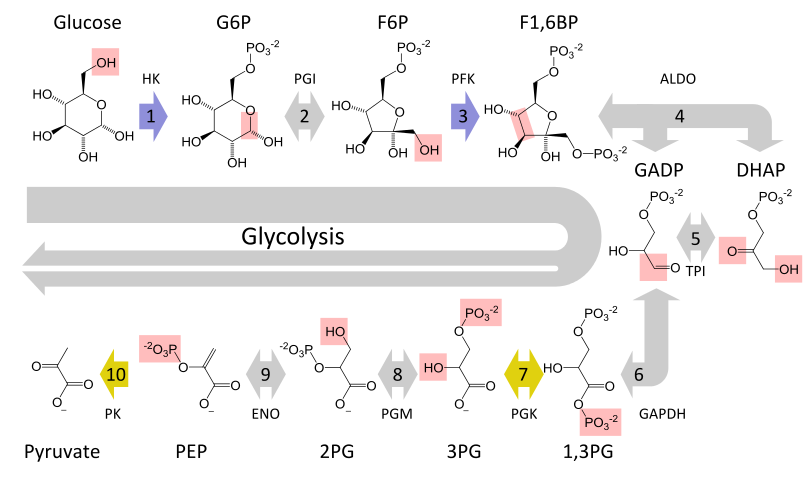

In [11]:
import cobra
from cobra import Model, Reaction, Metabolite

## Metabolites are Network Nodes


In [2]:
#Glucose 
glc__D_c = Metabolite('glc__D_c',
    name='D-glucose',
    formula='C6H12O6',
    compartment='c',
    charge=0
)

#Glucose-6-Phosphate
g6p_c=Metabolite('g6p_c',
    name='D-glucose 6-phosphate',
    formula='C6H11O9P',
    compartment='c',
    charge=-2
)

#ATP
atp_c=Metabolite('atp_c',
    name='ATP',
    formula='C10H12N5O13P3',
    compartment='c',
    charge=-4
)

#ADP
adp_c=Metabolite('adp_c',
    name='ADP',
    formula='C10H12N5O10P2',
    compartment='c',
    charge=-3
)

#H ion
h_c=Metabolite('h_c',
    name='H+',
    formula='H',
    compartment='c',
    charge=1
)

## Reactions are Network Links

In [3]:
#First Reaction of Glycolysis Pathway, Hexokinase
HEX1 = Reaction('HEX1')

#Define the bounds to define the reversibility of the reaction
HEX1.lower_bound = 0.
HEX1.upper_bound = 1000.

#Add metabolites with the appropriate stoichiometry
HEX1.add_metabolites({
    atp_c: -1.0,
    glc__D_c: -1.0,
    g6p_c: 1.0,
    adp_c: 1.0,
    h_c: 1.0
    })

In [4]:
HEX1.reaction

'atp_c + glc__D_c --> adp_c + g6p_c + h_c'

# If we extended this creation of metabolites and reactions we end up with the following S matrix for Glycolysis as a system

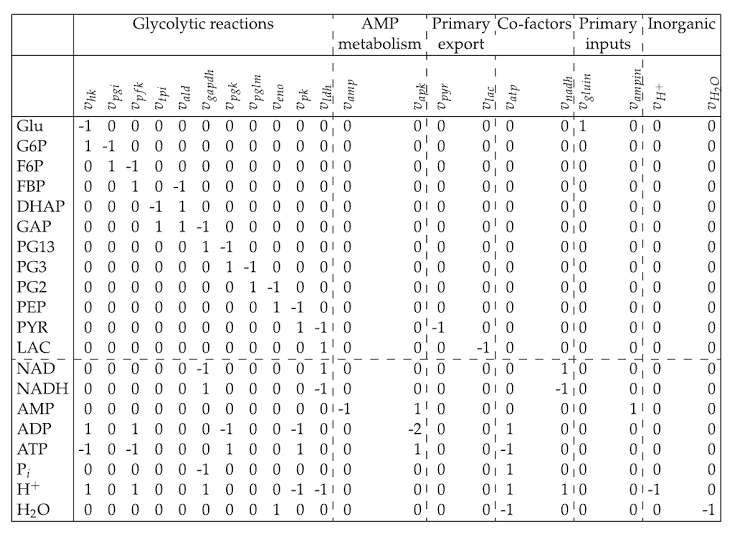

# Escher can be utilized to visualize pathways from a model

In [9]:
import escher
from escher import Builder

In [1]:
import escher.urls
from IPython.display import HTML
path = 'Glycolysis.json'
escher_map = escher.Builder(map_json=path)
escher_map.display_in_notebook()

# A complete model consists of many reactions and metabolites as we defined above. Here we load the E coli core model

In [13]:
model = cobra.io.json.from_json(escher.plots.model_json_for_name('e_coli_core'))

In [14]:
print ('Reactions')
print ('---------')
for reaction in model.reactions:
    print('%s : %s' % (reaction.id, reaction.reaction))

Reactions
---------
ACALD : acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
ACALDt : acald_e <=> acald_c
ACKr : ac_c + atp_c <=> actp_c + adp_c
ACONTa : cit_c <=> acon_C_c + h2o_c
ACONTb : acon_C_c + h2o_c <=> icit_c
ACt2r : ac_e + h_e <=> ac_c + h_c
ADK1 : amp_c + atp_c <=> 2.0 adp_c
AKGDH : akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
AKGt2r : akg_e + h_e <=> akg_c + h_c
ALCD2x : etoh_c + nad_c <=> acald_c + h_c + nadh_c
ATPM : atp_c + h2o_c --> adp_c + h_c + pi_c
ATPS4r : adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
BIOMASS_Ecoli_core_w_GAM : 1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
CO2t : co2_e <=> co2_c
CS : accoa_c + h2o_c + oaa_c --> cit_c + coa_c + h_c
CYTBD : 2.0